In [ ]:
# Step 1: Import Libraries
import pandas as pd

# Step 2: Load CSV files
orders = pd.read_csv('olist_orders_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')

# Step 3: Merge DataFrames
# Merge orders with order_items
df = pd.merge(orders, order_items, on='order_id', how='inner')

# Merge with customers
df = pd.merge(df, customers, on='customer_id', how='inner')

# Merge with products
df = pd.merge(df, products, on='product_id', how='left')

# Merge with payments
df = pd.merge(df, payments, on='order_id', how='left')

# Merge with reviews
df = pd.merge(df, reviews, on='order_id', how='left')

# Step 4: Convert timestamp columns
date_cols = ['order_purchase_timestamp', 'order_approved_at',
             'order_delivered_carrier_date', 'order_delivered_customer_date',
             'order_estimated_delivery_date']

for col in date_cols:
    df[col] = pd.to_datetime(df[col])

# Step 5: Handle missing values
# Fill missing review scores with 0
df['review_score'] = df['review_score'].fillna(0)

# Fill missing payment values with 0
df['payment_value'] = df['payment_value'].fillna(0)

# Drop rows where delivery date is missing
df = df.dropna(subset=['order_delivered_customer_date'])

# Step 6: Feature Engineering

# Delivery time in days
df['delivery_time_days'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

# Revenue per item = price + freight
df['revenue'] = df['price'] + df['freight_value']

# Review Sentiment
def get_sentiment(score):
    if score >= 4:
        return 'Positive'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Negative'

df['review_sentiment'] = df['review_score'].apply(get_sentiment)

# Optional: Select important columns for analysis
df_final = df[['order_id', 'customer_id', 'product_id', 'order_purchase_timestamp',
               'order_delivered_customer_date', 'delivery_time_days', 'price', 'freight_value',
               'revenue', 'review_score', 'review_sentiment', 'payment_value', 'customer_state',
               'product_category_name']]

# Display first few rows
print(df_final.head())



                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

                         product_id order_purchase_timestamp  \
0  87285b34884572647811a353c7ac498a      2017-10-02 10:56:33   
1  87285b34884572647811a353c7ac498a      2017-10-02 10:56:33   
2  87285b34884572647811a353c7ac498a      2017-10-02 10:56:33   
3  595fac2a385ac33a80bd5114aec74eb8      2018-07-24 20:41:37   
4  aa4383b373c6aca5d8797843e5594415      2018-08-08 08:38:49   

  order_delivered_customer_date  delivery_time_days   price  freight_value  \
0           2017-10-10 21:25:13                   8   29.99           8.72   
1           2017-10-

In [ ]:

df_final.to_csv('olist_order_reviews_dataset.csv', index=False)

print("✅ File saved as 'olist_order_reviews_dataset.csv'")
df.head()

✅ File saved as 'olist_order_reviews_dataset.csv'


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,delivery_time_days,revenue,review_sentiment
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,8,38.71,Positive
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,8,38.71,Positive
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,8,38.71,Positive
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,13,141.46,Positive
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,9,179.12,Positive


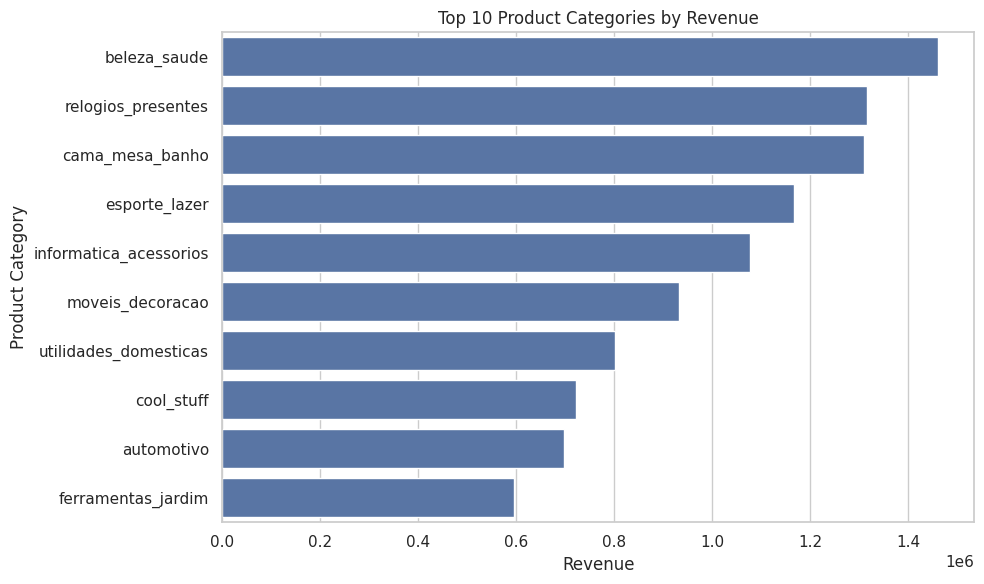

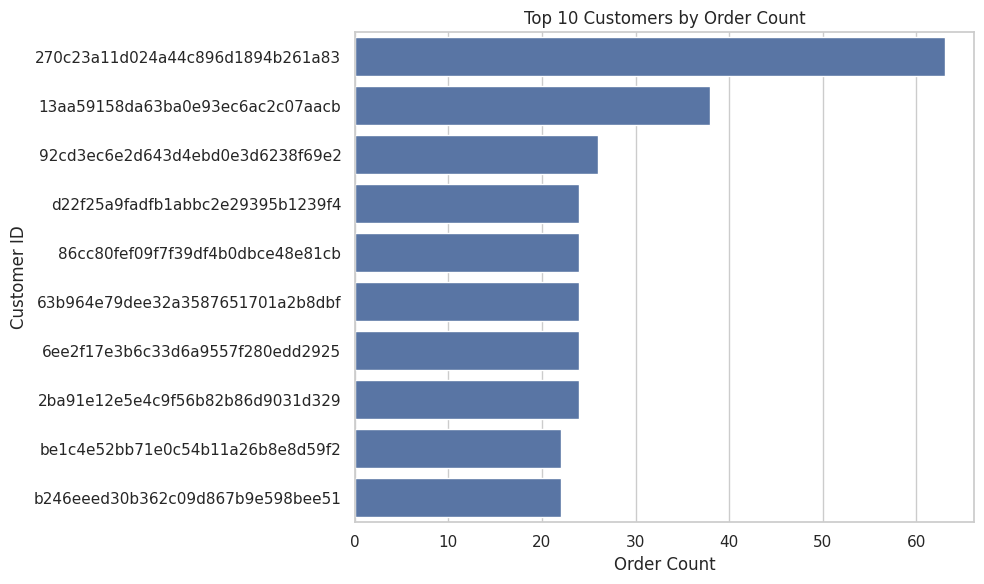

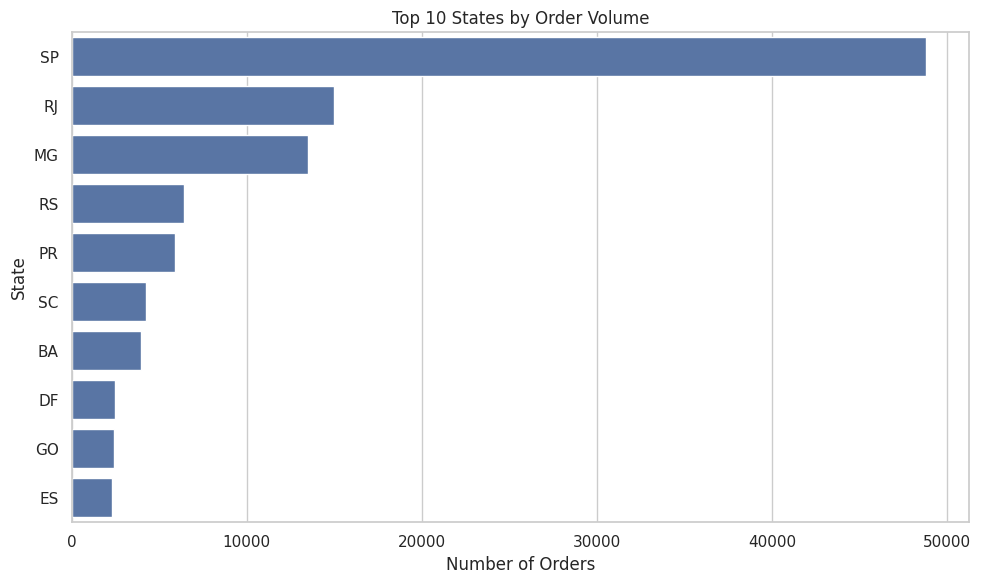

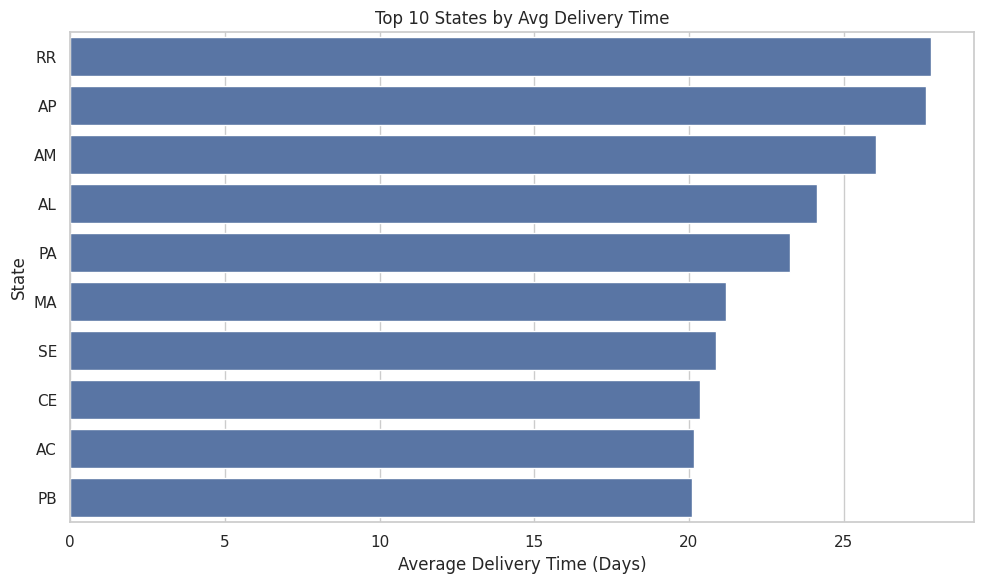

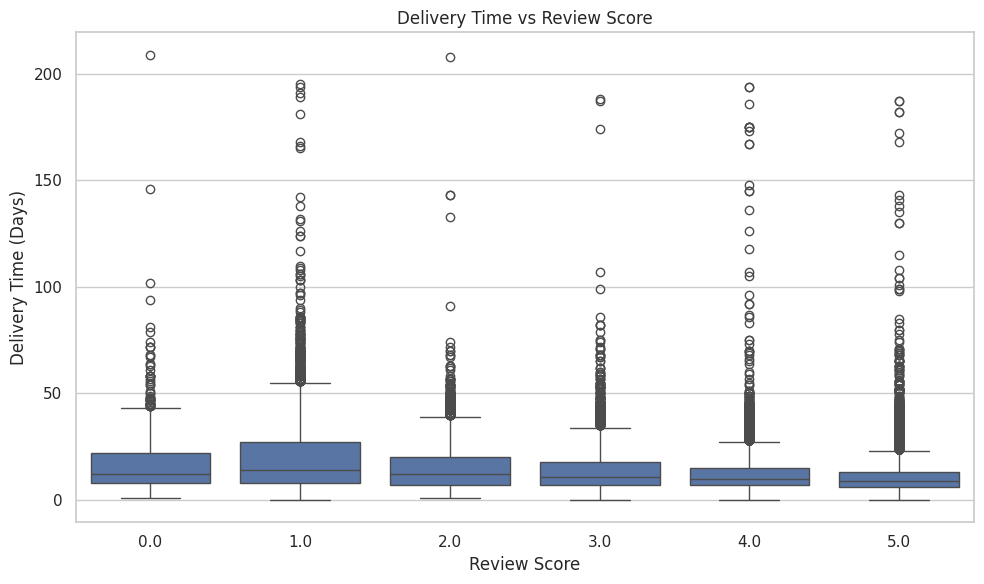

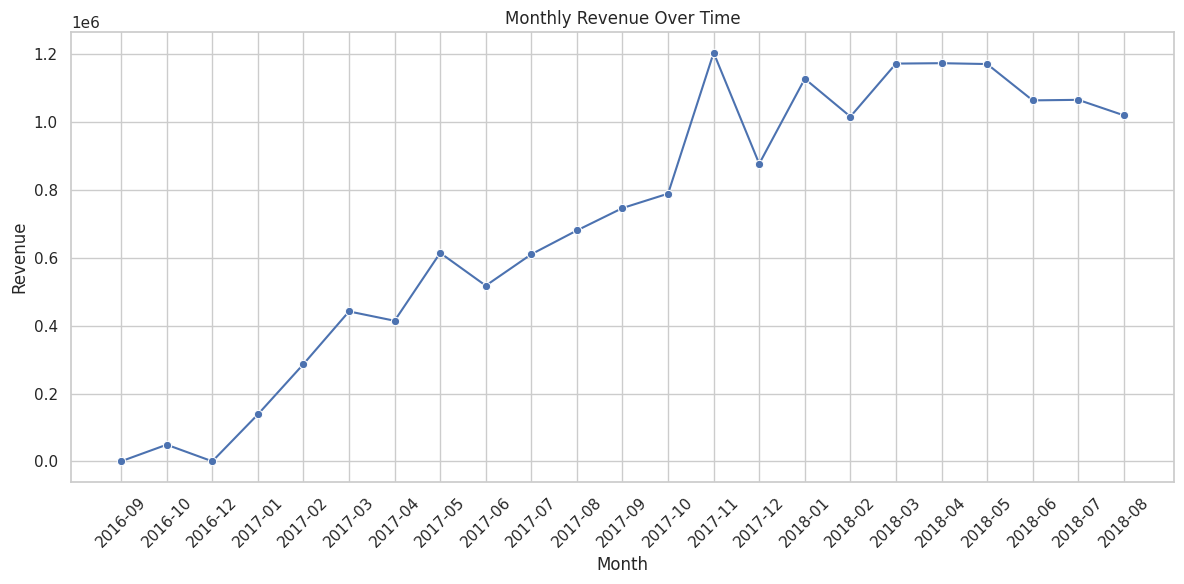

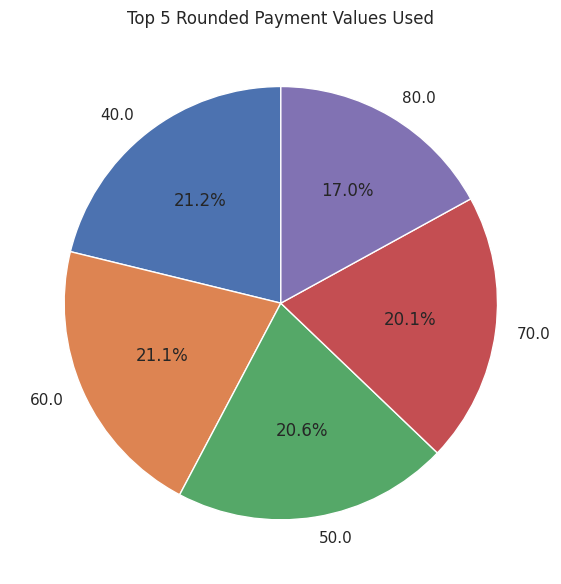

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set seaborn style for better visuals
sns.set(style="whitegrid")

# Convert purchase timestamp to datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# ----------------------------
# 1. Top 10 Product Categories by Revenue
# ----------------------------
plt.figure(figsize=(10, 6))
category_sales = df.groupby('product_category_name')['revenue'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=category_sales.values, y=category_sales.index)
plt.title('Top 10 Product Categories by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

# ----------------------------
# 2. Top 10 Customers by Order Count
# ----------------------------
plt.figure(figsize=(10, 6))
top_customers = df['customer_id'].value_counts().head(10)
sns.barplot(x=top_customers.values, y=top_customers.index)
plt.title('Top 10 Customers by Order Count')
plt.xlabel('Order Count')
plt.ylabel('Customer ID')
plt.tight_layout()
plt.show()

# ----------------------------
# 3. Top 10 States by Order Volume
# ----------------------------
plt.figure(figsize=(10, 6))
state_orders = df['customer_state'].value_counts().head(10)
sns.barplot(x=state_orders.values, y=state_orders.index)
plt.title('Top 10 States by Order Volume')
plt.xlabel('Number of Orders')
plt.ylabel('State')
plt.tight_layout()
plt.show()

# ----------------------------
# 4. Top 10 States by Average Delivery Time
# ----------------------------
plt.figure(figsize=(10, 6))
avg_delivery_by_state = df.groupby('customer_state')['delivery_time_days'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_delivery_by_state.values, y=avg_delivery_by_state.index)
plt.title('Top 10 States by Avg Delivery Time')
plt.xlabel('Average Delivery Time (Days)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

# ----------------------------
# 5. Delivery Time vs Review Score - Box Plot
# ----------------------------
plt.figure(figsize=(10, 6))
sns.boxplot(x='review_score', y='delivery_time_days', data=df)
plt.title('Delivery Time vs Review Score')
plt.xlabel('Review Score')
plt.ylabel('Delivery Time (Days)')
plt.tight_layout()
plt.show()

# ----------------------------
# 6. Monthly Revenue Over Time
# ----------------------------
df['order_month'] = df['order_purchase_timestamp'].dt.to_period('M').astype(str)
monthly_revenue = df.groupby('order_month')['revenue'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='order_month', y='revenue', marker='o')
plt.title('Monthly Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ----------------------------
# 7. Top 5 Payment Values Used (Rounded) - Pie Chart
# ----------------------------
# Optional: Round payment values for aggregation
df['rounded_payment'] = df['payment_value'].round(-1)  # e.g., 100, 110, 120

plt.figure(figsize=(6, 6))
df['rounded_payment'].value_counts().head(5).plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Rounded Payment Values Used')
plt.ylabel('')
plt.tight_layout()
plt.show()